# Black-Scholes - Implied distributions

> Author: Gustavo Monteiro de Athayde  
> Monitor: Sylvio Ximenez de Azevedo Neto - <<sylvioxan@insper.edu.br>>  
> Date: 15/03/2025



In [1]:
from lib import derivatives as dg

import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd

## Cubic Spline Interpolation in detail

In [2]:
### parameters

# strikes and vols
strikes = [80, 90, 100, 110, 120]
vols = [0.18, 0.14, 0.12, 0.14, 0.18]

# spot and rate
spot = 100
rate = 0.03     # 15% annual rate
time = 0.5      # 6 months

# allocate spline matrix
columns = ['a1', 'b1', 'c1', 'd1', 'a2', 'b2', 'c2', 'd2', 'a3', 'b3', 'c3', 'd3', 'a4', 'b4', 'c4', 'd4']
index = [
    'Pol1_Pt1', 'Pol1_Pt2', 'Pol2_Pt2', 'Pol2_Pt3', 'Pol3_Pt3', 'Pol3_Pt4', 'Pol4_Pt4', 'Pol4_Pt5',
    'D_Pol1=D_Pol2', 'D_Pol2=D_Pol3', 'D_Pol3=D_Pol4',
    'C_Pol1=C_Pol2', 'C_Pol2=C_Pol3', 'C_Pol3=C_Pol4',
    'Contr_Pt1', 'Contr_Pt5'
]

M = pd.DataFrame(index=index, columns=columns)

### functions
M.loc['Pol1_Pt1'] = [ strikes[0]**3, strikes[0]**2, strikes[0], 1,  0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0 ]
M.loc['Pol1_Pt2'] = [ strikes[1]**3, strikes[1]**2, strikes[1], 1,  0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0 ]

M.loc['Pol2_Pt2'] = [ 0, 0, 0, 0,  strikes[1]**3, strikes[1]**2, strikes[1], 1,  0, 0, 0, 0,  0, 0, 0, 0 ]
M.loc['Pol2_Pt3'] = [ 0, 0, 0, 0,  strikes[2]**3, strikes[2]**2, strikes[2], 1,  0, 0, 0, 0,  0, 0, 0, 0 ]

M.loc['Pol3_Pt3'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  strikes[2]**3, strikes[2]**2, strikes[2], 1,  0, 0, 0, 0 ]
M.loc['Pol3_Pt4'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  strikes[3]**3, strikes[3]**2, strikes[3], 1,  0, 0, 0, 0 ]

M.loc['Pol4_Pt4'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  strikes[3]**3, strikes[3]**2, strikes[3], 1 ]
M.loc['Pol4_Pt5'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  strikes[4]**3, strikes[4]**2, strikes[4], 1 ]

M.loc['D_Pol1=D_Pol2'] = [ 3*strikes[1]**2, 2*strikes[1], 1, 0,  -3*strikes[1]**2, -2*strikes[1], -1, 0,  0, 0, 0, 0,  0, 0, 0, 0 ]
M.loc['D_Pol2=D_Pol3'] = [ 0, 0, 0, 0,  3*strikes[2]**2, 2*strikes[2], 1, 0,  -3*strikes[2]**2, -2*strikes[2], -1, 0,  0, 0, 0, 0 ]
M.loc['D_Pol3=D_Pol4'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  3*strikes[3]**2, 2*strikes[3], 1, 0,  -3*strikes[3]**2, -2*strikes[3], -1, 0 ]

M.loc['C_Pol1=C_Pol2'] = [ 6*strikes[1], 2, 0, 0,  -6*strikes[1], -2, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0 ]
M.loc['C_Pol2=C_Pol3'] = [ 0, 0, 0, 0,  6*strikes[2], 2, 0, 0,  -6*strikes[2], -2, 0, 0,  0, 0, 0, 0 ]
M.loc['C_Pol3=C_Pol4'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  6*strikes[3], 2, 0, 0,  -6*strikes[3], -2, 0, 0 ]

# M.loc['Contr_Pt1'] = [ 1, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0 ]
# M.loc['Contr_Pt5'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 1 ]

M.loc['Contr_Pt1'] = [ 6*strikes[0], 2, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0 ]
M.loc['Contr_Pt5'] = [ 0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  6*strikes[4], 2, 0, 0 ]

# result vector
y = np.array([vols[0], vols[1], vols[1], vols[2], vols[2], vols[3], vols[3], vols[4], 0, 0, 0, 0, 0, 0, 0, 0])

# solve system
MI = np.linalg.inv(M.to_numpy(float))
a = np.dot(MI, y)

# calculate result
space_min = strikes[0] - 10
space_max = strikes[-1] + 10
strike_range = np.linspace(space_min, space_max, 100)
result = pd.DataFrame(index=strike_range, columns=['vol', 'Call Mkt', 'Call BS', 'Prob Mkt', 'Prob BS'])

for i, strike in enumerate(strike_range):

    if strike < strikes[1]:
        vol = a[0]*strike**3 + a[1]*strike**2 + a[2]*strike + a[3]
    elif strike < strikes[2]:
        vol = a[4]*strike**3 + a[5]*strike**2 + a[6]*strike + a[7]
    elif strike < strikes[3]:
        vol = a[8]*strike**3 + a[9]*strike**2 + a[10]*strike + a[11]
    else:
        vol = a[12]*strike**3 + a[13]*strike**2 + a[14]*strike + a[15]

    # calculate Mkt and BS call prices
    call_mkt = dg.bs_call_option(spot, strike, time, rate, vol)
    call_bs = dg.bs_call_option(spot, strike, time, rate, vols[2])            # <-- use ATM vol

    # save results
    result.loc[strike] = [vol, call_mkt, call_bs, 0, 0]
    
# calculate probabilities using butterfly spreads
for i, strike in enumerate(strike_range):    
    if i > 0 and i < len(strike_range)-1:

        # calculate probabilities
        prob_mkt = result.loc[strike_range[i-1], 'Call Mkt'] - 2*result.loc[strike, 'Call Mkt'] + result.loc[strike_range[i+1], 'Call Mkt']
        prob_bs = result.loc[strike_range[i-1], 'Call BS'] - 2*result.loc[strike, 'Call BS'] + result.loc[strike_range[i+1], 'Call BS']        
        
        result.loc[strike, 'Prob Mkt'] = prob_mkt
        result.loc[strike, 'Prob BS'] = prob_bs

In [3]:
M

,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4
Pol1_Pt1,512000,6400,80,1,0,0,0,0,0,0,0,0,0,0,0,0
Pol1_Pt2,729000,8100,90,1,0,0,0,0,0,0,0,0,0,0,0,0
Pol2_Pt2,0,0,0,0,729000,8100,90,1,0,0,0,0,0,0,0,0
Pol2_Pt3,0,0,0,0,1000000,10000,100,1,0,0,0,0,0,0,0,0
Pol3_Pt3,0,0,0,0,0,0,0,0,1000000,10000,100,1,0,0,0,0
Pol3_Pt4,0,0,0,0,0,0,0,0,1331000,12100,110,1,0,0,0,0
Pol4_Pt4,0,0,0,0,0,0,0,0,0,0,0,0,1331000,12100,110,1
Pol4_Pt5,0,0,0,0,0,0,0,0,0,0,0,0,1728000,14400,120,1
D_Pol1=D_Pol2,24300,180,1,0,-24300,-180,-1,0,0,0,0,0,0,0,0,0
D_Pol2=D_Pol3,0,0,0,0,30000,200,1,0,-30000,-200,-1,0,0,0,0,0


In [4]:
result

,vol,Call Mkt,Call BS,Prob Mkt,Prob BS
70.000000,0.22,31.078376,31.042173,0,0
70.606061,0.217891,30.484864,30.445141,0.000225,0.000003
71.212121,0.215723,29.891576,29.848112,0.000235,0.000005
71.818182,0.2135,29.298524,29.251088,0.000247,0.000007
72.424242,0.211225,28.705719,28.65407,0.000261,0.00001
...,...,...,...,...,...
127.575758,0.211225,0.457037,0.010297,0.000113,0.000317
128.181818,0.2135,0.447176,0.008589,0.00007,0.00027
128.787879,0.215723,0.437386,0.007152,0.00003,0.00023
129.393939,0.217891,0.427626,0.005944,-0.000006,0.000195


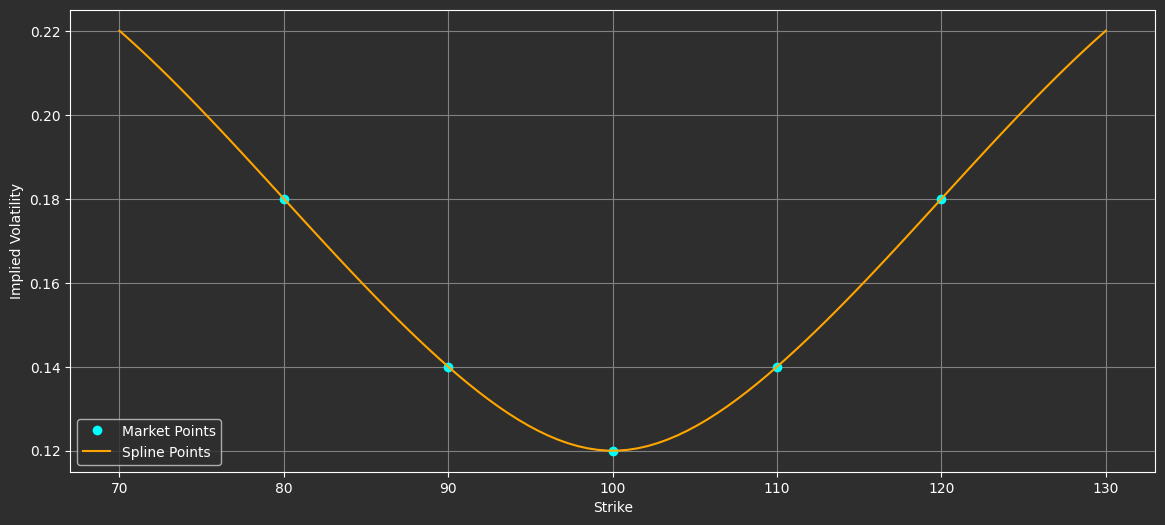

In [5]:
### Implied volatility plot

# Use a dark style
# Set the background color to dark grey
plt.rcParams['axes.facecolor'] = '#2E2E2E'
plt.rcParams['figure.facecolor'] = '#2E2E2E'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# Implied volatility plot
plt.figure(figsize=(14,6))
plt.plot(strikes, vols, 'o', label='Market Points', color='cyan')
result.plot(y='vol', style='-', label='Spline Points', ax=plt.gca(), color='orange')
plt.xlabel('Strike', color='white')
plt.ylabel('Implied Volatility', color='white')
plt.legend()
plt.grid(color='gray')
plt.show()

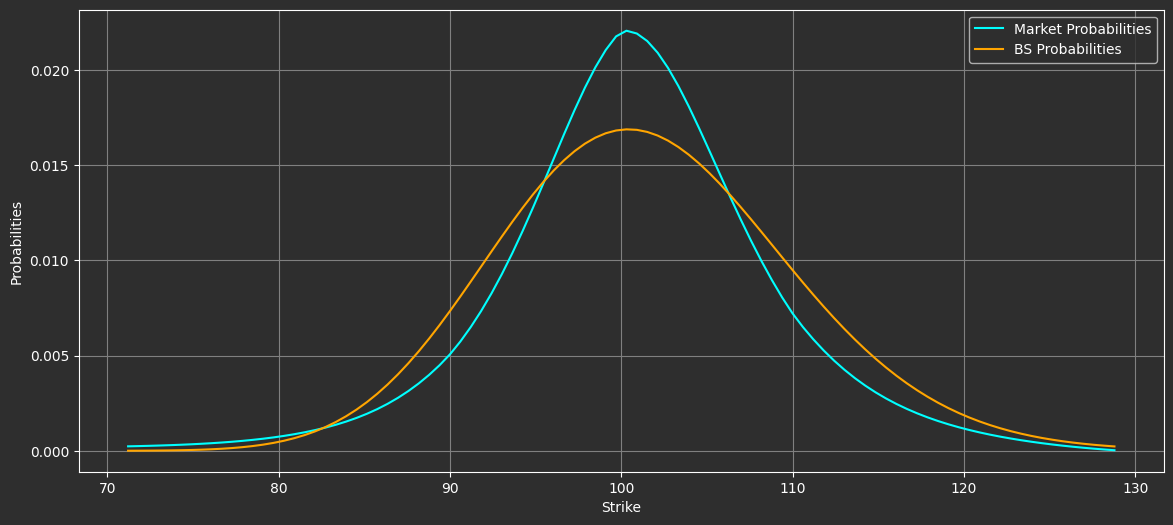

In [6]:
# Plot probabilities
plt.figure(figsize=(14,6))
result.loc[71:129].plot(y='Prob Mkt', style='-', label='Market Probabilities', ax=plt.gca(), color='cyan')
result.loc[71:129].plot(y='Prob BS', style='-', label='BS Probabilities', ax=plt.gca(), color='orange')
plt.xlabel('Strike', color='white')
plt.ylabel('Probabilities', color='white')
plt.legend()
plt.grid(color='gray')
plt.show()

## Cubic Spline Interpolation by a Scipy function

In [8]:
# scipy package - https://scipy.org/
from scipy.interpolate import CubicSpline

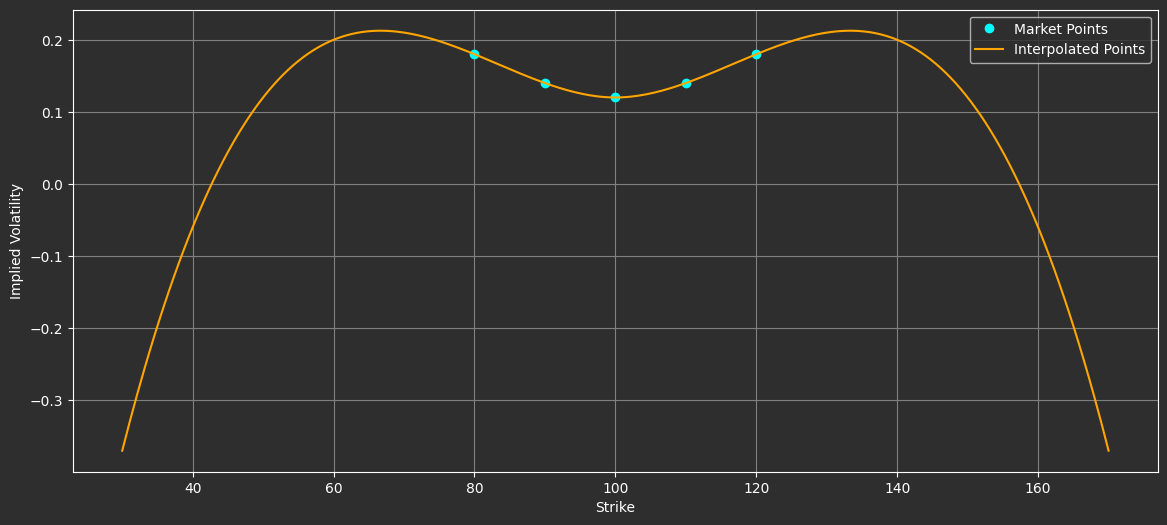

In [9]:
strikes = np.array([80, 90, 100, 110, 120])
vols = np.array([0.18, 0.14, 0.12, 0.14, 0.18])

cs = CubicSpline(strikes, vols)

space_min = strikes[0] - 50
space_max = strikes[-1] + 50
strike_range = np.linspace(space_min, space_max, 400)
interpolated_vols = cs(strike_range)

plt.figure(figsize=(14,6))
plt.plot(strikes, vols, 'o', label='Market Points', color='cyan')
plt.plot(strike_range, interpolated_vols, label='Interpolated Points', color='orange')
plt.xlabel('Strike', color='white')
plt.ylabel('Implied Volatility', color='white')
plt.legend()
plt.grid(color='gray')
plt.show()


## Implied distribution by log-normal mixture


In [93]:
# Importing scipy optimize package - https://docs.scipy.org/doc/scipy/reference/optimize.html
from scipy.optimize import minimize

In [94]:
# parameters
spot = 100
rate = 0.03
time = 0.5
strikes = np.array([80, 90, 100, 110, 120])
vols = np.array([0.18, 0.14, 0.12, 0.14, 0.18])

In [ ]:
# objective function
def objective_function(x, *args):

    strikes, vols = args

    prob = 1 / (1 + x[0]**2)
    rate_1 = x[1]
    rate_2 = x[2]
    sigma_1 = x[3]**2
    sigma_2 = x[4]**2

    # calculate call prices
    mkt_1 = dg.bs_call_option(spot, strikes[0], time, rate, vols[0])            # Market call price not BS, so we are using the market vol
    model_1 = (prob * dg.bs_call_option(spot, strikes[0], time, rate_1, sigma_1) + (1 - prob) * dg.bs_call_option(spot, strikes[0], time, rate_2, sigma_2)) * np.exp(-rate * time)

    mkt_2 = dg.bs_call_option(spot, strikes[1], time, rate, vols[1])
    model_2 = (prob * dg.bs_call_option(spot, strikes[1], time, rate_1, sigma_1) + (1 - prob) * dg.bs_call_option(spot, strikes[1], time, rate_2, sigma_2)) * np.exp(-rate * time)

    mkt_3 = dg.bs_call_option(spot, strikes[2], time, rate, vols[2])
    model_3 = (prob * dg.bs_call_option(spot, strikes[2], time, rate_1, sigma_1) + (1 - prob) * dg.bs_call_option(spot, strikes[2], time, rate_2, sigma_2)) * np.exp(-rate * time)

    mkt_4 = dg.bs_call_option(spot, strikes[3], time, rate, vols[3])
    model_4 = (prob * dg.bs_call_option(spot, strikes[3], time, rate_1, sigma_1) + (1 - prob) * dg.bs_call_option(spot, strikes[3], time, rate_2, sigma_2)) * np.exp(-rate * time)

    mkt_5 = dg.bs_call_option(spot, strikes[4], time, rate, vols[4])
    model_5 = (prob * dg.bs_call_option(spot, strikes[4], time, rate_1, sigma_1) + (1 - prob) * dg.bs_call_option(spot, strikes[4], time, rate_2, sigma_2)) * np.exp(-rate * time)

    # calculate individual errors
    error_1 = 100 * np.log(mkt_1 / model_1)
    error_2 = 100 * np.log(mkt_2 / model_2) 
    error_3 = 100 * np.log(mkt_3 / model_3)
    error_4 = 100 * np.log(mkt_4 / model_4)
    error_5 = 100 * np.log(mkt_5 / model_5)

    # calculate total error
    error = np.sqrt((error_1**2 + error_2**2 + error_3**2 + error_4**2 + error_5**2)/5)

    return error



In [96]:
# constraint
def constraint_eq(x):
    
    prob = 1 / (1 + x[0]**2)
    rate_1 = x[1]
    rate_2 = x[2]

    return (prob * spot * np.exp(rate_1 * time) + (1 - prob) * spot * np.exp(rate_2 * time)) - spot*np.exp(rate * time)

In [97]:
# optimization process
zero = 1e-6
args = (strikes, vols)
x0 = [0.1, 0.01, 0.06, 0.2, 0.4]
constrains = [{'type': 'eq', 'fun': constraint_eq}]

#optimization = minimize(objective_function, x0, args=args, constraints=constrains, tol=zero, method='SLSQP')
optimization = minimize(objective_function, x0, args=args, constraints=constrains, tol=zero, method='trust-constr')


c:\Users\sazevedo\Documents\work\qr\modeling\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


In [98]:
optimization

          message: `xtol` termination condition is satisfied.
          success: True
           status: 2
              fun: 0.42563385974832973
                x: [ 4.634e-01  2.714e-02  4.328e-02  2.815e-01  5.680e-01]
              nit: 64
             nfev: 474
             njev: 79
             nhev: 0
         cg_niter: 181
     cg_stop_cond: 1
             grad: [-3.979e-01 -3.216e+01 -6.962e+00 -6.407e-07  3.681e-06]
  lagrangian_grad: [-3.480e-05  8.241e-06 -3.608e-05 -6.407e-07  3.681e-06]
           constr: [array([-1.421e-14])]
              jac: [array([[ 5.161e-01,  4.172e+01,  9.032e+00,  0.000e+00,
                            0.000e+00]])]
      constr_nfev: [474]
      constr_njev: [0]
      constr_nhev: [0]
                v: [array([ 7.708e-01])]
           method: equality_constrained_sqp
       optimality: 3.6081123580444796e-05
 constr_violation: 1.4210854715202004e-14
   execution_time: 0.45371246337890625
        tr_radius: 2.614772248497321e-07
   constr_penal

In [99]:
# summary
_x = optimization.x

prob = 1 / (1 + _x[0]**2)
rate_1 = _x[1]
rate_2 = _x[2]
sigma_1 = _x[3]**2
sigma_2 = _x[4]**2

print('Prob:', prob)
print('Rate 1:', rate_1)
print('Rate 2:', rate_2)
print('Sigma 1:', sigma_1)
print('Sigma 2:', sigma_2)


Prob: 0.8232363686029429
Rate 1: 0.027136134084949196
Rate 2: 0.04328404431052452
Sigma 1: 0.07926737895894871
Sigma 2: 0.32259604184909063


In [100]:
# calculate results
space_min = strikes[0] - 10
space_max = strikes[-1] + 10
strike_range = np.linspace(space_min, space_max, 100)
result = pd.DataFrame(index=strike_range, columns=['Call Mix', 'Call BS', 'Prob Mix', 'Prob BS'])

for i, strike in enumerate(strike_range):

    # calculate prices
    call_mix = (prob * dg.bs_call_option(spot, strike, time, rate_1, sigma_1)) + ((1 - prob) * dg.bs_call_option(spot, strike, time, rate_2, sigma_2)) * np.exp(-rate * time)
    call_bs = dg.bs_call_option(spot, strike, time, rate, vols[2])            # <-- use ATM vol again

    # save results
    result.loc[strike] = [call_mix, call_bs, 0, 0]

# calculate probabilities using butterfly spreads
for i, strike in enumerate(strike_range):    
    if i > 0 and i < len(strike_range)-1:

        # calculate probabilities
        prob_mix = result.loc[strike_range[i-1], 'Call Mix'] - 2*result.loc[strike, 'Call Mix'] + result.loc[strike_range[i+1], 'Call Mix']
        prob_bs = result.loc[strike_range[i-1], 'Call BS'] - 2*result.loc[strike, 'Call BS'] + result.loc[strike_range[i+1], 'Call BS']        
        
        result.loc[strike, 'Prob Mix'] = prob_mix
        result.loc[strike, 'Prob BS'] = prob_bs

result

,Call Mix,Call BS,Prob Mix,Prob BS
70.000000,31.024772,31.042173,0,0
70.606061,30.435855,30.445141,0.000498,0.000003
71.212121,29.847437,29.848112,0.000522,0.000005
71.818182,29.259541,29.251088,0.000547,0.000007
72.424242,28.672193,28.65407,0.000571,0.00001
...,...,...,...,...
127.575758,0.387781,0.010297,0.000479,0.000317
128.181818,0.3737,0.008589,0.000465,0.00027
128.787879,0.360083,0.007152,0.000451,0.00023
129.393939,0.346918,0.005944,0.000438,0.000195


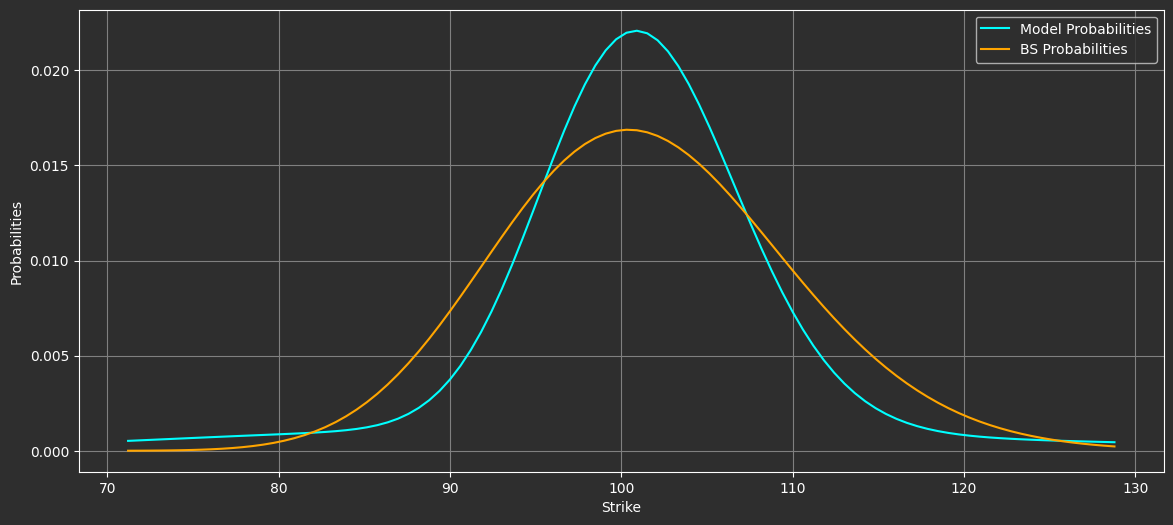

In [101]:
# plot implied probabilities
plt.figure(figsize=(14,6))
result.loc[71:129].plot(y='Prob Mix', style='-', label='Model Probabilities', ax=plt.gca(), color='cyan')
result.loc[71:129].plot(y='Prob BS', style='-', label='BS Probabilities', ax=plt.gca(), color='orange')
plt.xlabel('Strike', color='white')
plt.ylabel('Probabilities', color='white')
plt.legend()
plt.grid(color='gray')
plt.show()